In [50]:
#smFISh analysis corrections 

In [51]:
#scrip to read in the counts as a result of the threshod countimng
#reads in the roi file with the arae
#performs the normalized counting information
#subtracts the apical region from the basal and / over the total number of counts 

import seaborn as sns 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 7
plt.rcParams['font.sans-serif'] = 'Arial'


In [52]:
#read in the Col4a1-ecad dataframe results 
Col4a1_ecad=pd.read_csv("process-textfiles3/170910 Col4a1 smFISH anti-Ecad anti-Col4 co-staining-processingAll-Summary-2657.csv")
Col4a1_ecad.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2
0,1,5,8156,279,76
1,2,5,3954,272,80
2,3,5,4251,163,49
3,4,5,10978,369,115
4,5,5,9536,886,288


In [53]:
#read in the corresponding ROi file 
#read in the ROi area file 
Col4a1_ecad_ROI= pd.read_csv("process-textfiles3/170910 Col4a1 smFISH anti-Ecad anti-Col4 co-staining-ROIarea.csv")
Col4a1_ecad_ROI.head()

,file_name,AreaROI1,AreaROI2
0,1,1468.1983,802.6350
1,2,1765.8162,995.3892
2,3,1015.4521,526.8931
3,4,1017.7910,472.9164
4,5,2426.6803,1226.3274


In [54]:
#establish the apial and basal regions and do the calculations 
Col4a1_ecad_apical=Col4a1_ecad.inside_ROI1-Col4a1_ecad.inside_ROI2
Col4a1_ecad_basal=Col4a1_ecad.inside_ROI2
ROI_apical_Col4a1_ecad= Col4a1_ecad_ROI.AreaROI1-Col4a1_ecad_ROI.AreaROI2
ROI_basal_Col4a1_ecad= Col4a1_ecad_ROI.AreaROI2

Col4a1_ecad_apical_norm= (Col4a1_ecad_apical)/(ROI_apical_Col4a1_ecad)
Col4a1_ecad_basal_norm= (Col4a1_ecad_basal)/(ROI_basal_Col4a1_ecad)
Col4a1_ecad_total_norm= (Col4a1_ecad_apical_norm)+(Col4a1_ecad_basal_norm)
Col4a1_ecad['geneName_apical_norm']= Col4a1_ecad_apical_norm
Col4a1_ecad['geneName_basal_norm']= Col4a1_ecad_basal_norm
Col4a1_ecad['geneName_total_norm']= Col4a1_ecad_total_norm
Col4a1_ecad['Score']= (((Col4a1_ecad_apical_norm)-(Col4a1_ecad_basal_norm))/(Col4a1_ecad_total_norm))
Col4a1_ecad['Group']= "Col4a1-Ecad"
Col4a1_ecad.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,1,5,8156,279,76,0.305005,0.094688,0.399693,0.526196,Col4a1-Ecad
1,2,5,3954,272,80,0.249212,0.080371,0.329583,0.512289,Col4a1-Ecad
2,3,5,4251,163,49,0.233339,0.092998,0.326337,0.430050,Col4a1-Ecad
3,4,5,10978,369,115,0.466162,0.243172,0.709334,0.314366,Col4a1-Ecad
4,5,5,9536,886,288,0.498187,0.234848,0.733034,0.359245,Col4a1-Ecad


In [55]:
#read in the corresponding ROI file
Col4a1=pd.read_csv("process-textfiles3/170902 Col4a1 smFISH-processingAll-Summary-3345.csv")
Col4a1_ROI=pd.read_csv("process-textfiles3/170902 Col4a1 smFISH-ROIarea.csv")

In [56]:
Col4a1_apical=Col4a1.inside_ROI1-Col4a1.inside_ROI2
Col4a1_basal=Col4a1.inside_ROI2
ROI_apical_Col4a1= Col4a1_ROI.AreaROI1-Col4a1_ROI.AreaROI2
ROI_basal_Col4a1= Col4a1_ROI.AreaROI2

Col4a1_apical_norm= (Col4a1_apical)/(ROI_apical_Col4a1)
Col4a1_basal_norm= (Col4a1_basal)/(ROI_basal_Col4a1)
Col4a1_total_norm= (Col4a1_apical_norm)+(Col4a1_basal_norm)
Col4a1['geneName_apical_norm']= Col4a1_apical_norm
Col4a1['geneName_basal_norm']= Col4a1_basal_norm
Col4a1['geneName_total_norm']= Col4a1_total_norm
Col4a1['Score']= (((Col4a1_apical_norm)-(Col4a1_basal_norm))/(Col4a1_total_norm))
Col4a1['Group']="Col4a1"
#get the score for this dataset
#Col4a1['Score']= (Col4a1_apical_norm)-(Col4a1_basal_norm)/(Col4a1_total_norm)
Col4a1.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,20170902 Col4a1 smFISH 001,20,6649,224,97,0.455507,0.213807,0.669314,0.361115,Col4a1
1,20170902 Col4a1 smFISH 002,20,6472,247,97,0.453900,0.175732,0.629631,0.441794,Col4a1
2,20170902 Col4a1 smFISH 003,20,5555,237,110,0.357989,0.214780,0.572769,0.250029,Col4a1
3,20170902 Col4a1 smFISH 004,20,4357,218,113,0.311193,0.156578,0.467771,0.330536,Col4a1
4,20170902 Col4a1 smFISH 005,20,5464,210,57,0.486512,0.115070,0.601582,0.617442,Col4a1


In [57]:
#read in the col4a2 data 
Col4a2=pd.read_csv("process-textfiles3/171225-Col4a2-smFISH-MIP-of-centerZ-output-processingAll-Summary-3017.csv")
Col4a2_ROI=pd.read_csv("process-textfiles3/171225-Col4a2-smFISH-MIP-of-centerZ-output-ROIarea.csv")

In [58]:
#lets do the calculations and get the scores 
Col4a2_apical=Col4a2.inside_ROI1-Col4a2.inside_ROI2
Col4a2_basal=Col4a2.inside_ROI2
ROI_apical_Col4a2= Col4a2_ROI.AreaROI1-Col4a2_ROI.AreaROI2
ROI_basal_Col4a2= Col4a2_ROI.AreaROI2

Col4a2_apical_norm= (Col4a2_apical)/(ROI_apical_Col4a2)
Col4a2_basal_norm= (Col4a2_basal)/(ROI_basal_Col4a2)
Col4a2_total_norm= (Col4a2_apical_norm)+(Col4a2_basal_norm)
Col4a2['geneName_apical_norm']= Col4a2_apical_norm
Col4a2['geneName_basal_norm']= Col4a2_basal_norm
Col4a2['geneName_total_norm']= Col4a2_total_norm
Col4a2['Score']= (((Col4a2_apical_norm)-(Col4a2_basal_norm))/(Col4a2_total_norm))
Col4a2['Group']="Col4a2"
#get the score for this dataset
#Col4a2['Score']= (Col4a2_apical_norm)-(Col4a2_basal_norm)/(Col4a2_total_norm)
Col4a2.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,08_Col4a2_1-1-MIP,26,3780,563,176,0.516198,0.243336,0.759534,0.359249,Col4a2
1,09_Col4a2_1-2-MIP,26,2594,506,107,0.506114,0.189059,0.695173,0.456080,Col4a2
2,11_Col4a2_2-1-MIP,26,3368,762,245,0.804298,0.393252,1.197550,0.343239,Col4a2
3,12_Col4a2_2-2-MIP,26,5300,653,263,0.945191,0.415955,1.361146,0.388816,Col4a2
4,13_Col4a2_2-3-MIP,26,1781,397,108,0.554796,0.176959,0.731755,0.516345,Col4a2


In [59]:
#for GAPDH
#read in the count file 
GADPH=pd.read_csv("process-textfiles3/171225-GAPDH-smFISH-MIP-of-centerZ-processingAll-Summary-1630.csv")
#read in the ROI file
GADPH_ROI=pd.read_csv("process-textfiles3/171225-GAPDH-smFISH-MIP-of-centerZ-ROIarea.csv")
GADPH_ROI.head()

,file_name,AreaROI1,AreaROI2
0,25_GAPDH_1-1-MIP,1375.0720,720.8410
1,26_GAPDH_1-2-MIP,988.9895,604.2561


In [60]:
#split the data and get the score 
GADPH_apical=GADPH.inside_ROI1-GADPH.inside_ROI2
GADPH_basal=GADPH.inside_ROI2
ROI_apical_GADPH= GADPH_ROI.AreaROI1-GADPH_ROI.AreaROI2
ROI_basal_GADPH= GADPH_ROI.AreaROI2

GADPH_apical_norm= (GADPH_apical)/(ROI_apical_GADPH)
GADPH_basal_norm= (GADPH_basal)/(ROI_basal_GADPH)
GADPH_total_norm= (GADPH_apical_norm)+(GADPH_basal_norm)
GADPH['geneName_apical_norm']= GADPH_apical_norm
GADPH['geneName_basal_norm']= GADPH_basal_norm
GADPH['geneName_total_norm']= GADPH_total_norm
GADPH['Score']= (((GADPH_apical_norm)-(GADPH_basal_norm))/(GADPH_total_norm))
GADPH['Group']="GAPDH"
#get the score for this dataset
#GADPH['Score']= (GADPH_apical_norm)-(GADPH_basal_norm)/(GADPH_total_norm)
GADPH.head()


,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,25_GAPDH_1-1-MIP,32,9830,1809,912,1.371075,1.265189,2.636264,0.040165,GAPDH
1,26_GAPDH_1-2-MIP,32,13658,2089,1246,2.191128,2.062040,4.253167,0.030351,GAPDH


In [61]:
#cdh1 datasets 
cdh1= pd.read_csv("process-textfiles3/171022-Cdh1-TMR-smFISH-processingAll-Summary-6171.csv")
cdh1_ROI= pd.read_csv("process-textfiles3/171022-Cdh1-TMR-smFISH-ROIarea.csv")

In [62]:
#lets do some calculations 
cdh1_apical=cdh1.inside_ROI1-cdh1.inside_ROI2
cdh1_basal=cdh1.inside_ROI2
ROI_apical_cdh1= cdh1_ROI.AreaROI1-cdh1_ROI.AreaROI2
ROI_basal_cdh1= cdh1_ROI.AreaROI2

cdh1_apical_norm= (cdh1_apical)/(ROI_apical_cdh1)
cdh1_basal_norm= (cdh1_basal)/(ROI_basal_cdh1)
cdh1_total_norm= (cdh1_apical_norm)+(cdh1_basal_norm)
cdh1['geneName_apical_norm']= cdh1_apical_norm
cdh1['geneName_basal_norm']= cdh1_basal_norm
cdh1['geneName_total_norm']= cdh1_total_norm
cdh1['Score']= (((cdh1_apical_norm)-(cdh1_basal_norm))/(cdh1_total_norm))
cdh1['Group']="Cdh1"
#get the score for this dataset
cdh1.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,20171022 cdh1-tmr_ctrl fullres_SMG1-2,68,411,185,61,0.229409,0.092703,0.322113,0.424404,Cdh1
1,20171022 cdh1-tmr_ctrl fullres_SMG2-3,68,414,151,32,0.236577,0.072967,0.309543,0.528554,Cdh1
2,20171022 cdh1-tmr_ctrl fullres_SMG3-2,68,330,101,44,0.224305,0.106961,0.331266,0.354230,Cdh1
3,20171022 cdh1-tmr_home-labeled fullres_SMG1-3,68,363,167,93,0.263552,0.142355,0.405907,0.298585,Cdh1
4,20171022 cdh1-tmr_home-labeled fullres_SMG2-2,68,334,123,51,0.179935,0.099144,0.279078,0.289492,Cdh1


In [63]:
#for the net1 files 
net1=pd.read_csv("process-textfiles3/171225-Net1-smFISH-MIP-of-centerZ-output-processingAll-Summary-8733.csv")
net1_ROI=pd.read_csv("process-textfiles3/171225-Net1-smFISH-MIP-of-centerZ-output-ROIarea.csv")

In [64]:
#split the files and get the scores 
net1_apical=net1.inside_ROI1-net1.inside_ROI2
net1_basal=net1.inside_ROI2
ROI_apical_net1= net1_ROI.AreaROI1-net1_ROI.AreaROI2
ROI_basal_net1= net1_ROI.AreaROI2

net1_apical_norm= (net1_apical)/(ROI_apical_net1)
net1_basal_norm= (net1_basal)/(ROI_basal_net1)
net1_total_norm= (net1_apical_norm)+(net1_basal_norm)
net1['geneName_apical_norm']= net1_apical_norm
net1['geneName_basal_norm']= net1_basal_norm
net1['geneName_total_norm']= net1_total_norm
net1['Score']= (((net1_apical_norm)-(net1_basal_norm))/(net1_total_norm))
net1['Group']="Net1"
#get the score for this dataset
#net1['Score']= (net1_apical_norm)-(net1_basal_norm)/(net1_total_norm)
net1.head()


,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,14_Net1_1-1-MIP,45,1181,170,131,0.084835,0.206987,0.291822,-0.418582,Net1
1,15_Net1_1-2-MIP,45,3102,611,404,0.300818,0.540987,0.841805,-0.285302,Net1


In [65]:
#for the sox9 datasets
Sox9=pd.read_csv("process-textfiles3/171211-Sox9-smFISH-MIP-of-centerZ-modifiedoutput-processingAll-Summary-9730.csv")
Sox9_ROI=pd.read_csv("process-textfiles3/171211-Sox9-smFISH-MIP-of-centerZ-modifiedoutput-ROIarea.csv")

In [66]:
#get the scores and regions 
Sox9_apical=Sox9.inside_ROI1-Sox9.inside_ROI2
Sox9_basal=Sox9.inside_ROI2
ROI_apical_Sox9= Sox9_ROI.AreaROI1-Sox9_ROI.AreaROI2
ROI_basal_Sox9= Sox9_ROI.AreaROI2

Sox9_apical_norm= (Sox9_apical)/(ROI_apical_Sox9)
Sox9_basal_norm= (Sox9_basal)/(ROI_basal_Sox9)
Sox9_total_norm= (Sox9_apical_norm)+(Sox9_basal_norm)
Sox9['genName_apical_norm']= Sox9_apical_norm
Sox9['geneName_basal_norm']= Sox9_basal_norm
Sox9['geneName_total_norm']= Sox9_total_norm
Sox9['Score']= (((Sox9_apical_norm)-(Sox9_basal_norm))/(Sox9_total_norm))
Sox9['Group']="Sox9"
#get the score for this dataset
#Sox9['Score']= (Sox9_apical_norm)-(Sox9_basal_norm)/(Sox9_total_norm)
Sox9.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,genName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,171211_smFISH_Sox9-SMG1_01-MIP,52,1121,244,106,0.431166,0.207092,0.638258,0.351070,Sox9
1,171211_smFISH_Sox9-SMG1_02-MIP,52,2039,566,285,1.077025,0.566362,1.643387,0.310738,Sox9
2,171211_smFISH_Sox9-SMG1_03-MIP,52,2078,735,443,1.030728,0.893301,1.924028,0.071427,Sox9
3,171211_smFISH_Sox9-SMG1_04-MIP,52,278,76,38,0.107945,0.123341,0.231286,-0.066567,Sox9
4,171211_smFISH_Sox9_SMG2_1-MIP,52,2156,671,478,1.073467,0.886050,1.959518,0.095644,Sox9


In [67]:
#read in the sox10 files 
Sox10=pd.read_csv("process-textfiles3/171210-Sox10-smFISH-MIP-of-centerZ-modifiedoutput-processingAll-Summary-8356.csv")
Sox10_ROI=pd.read_csv("process-textfiles3/171210-Sox10-smFISH-MIP-of-centerZ-modifiedoutput-ROIarea.csv")

In [68]:
#do the calcs and the seperation of the regions 
Sox10_apical=Sox10.inside_ROI1-Sox10.inside_ROI2
Sox10_basal=Sox10.inside_ROI2
ROI_apical_Sox10= Sox10_ROI.AreaROI1-Sox10_ROI.AreaROI2
ROI_basal_Sox10= Sox10_ROI.AreaROI2

Sox10_apical_norm= (Sox10_apical)/(ROI_apical_Sox10)
Sox10_basal_norm= (Sox10_basal)/(ROI_basal_Sox10)
Sox10_total_norm= (Sox10_apical_norm)+(Sox10_basal_norm)
Sox10['geneName_apical_norm']= Sox10_apical_norm
Sox10['geneName_basal_norm']= Sox10_basal_norm
Sox10['geneName_total_norm']= Sox10_total_norm
Sox10['Score']= (((Sox10_apical_norm)-(Sox10_basal_norm))/(Sox10_total_norm))
Sox10['Group']="Sox10"
#get the score for this dataset
#Sox10['Score']= (Sox10_apical_norm)-(Sox10_basal_norm)/(Sox10_total_norm)
Sox10.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,171210_smFISH_Sox10_33-MIP,20,2647,1000,530,1.833761,1.210084,3.043846,0.204898,Sox10
1,171210_smFISH_Sox10_34-MIP,20,2807,801,297,1.445655,1.074982,2.520637,0.147055,Sox10
2,171210_smFISH_Sox10_35-MIP,20,1939,728,373,1.076291,0.834761,1.911051,0.126386,Sox10
3,171210_smFISH_Sox10_36-MIP,20,769,173,104,0.266052,0.246112,0.512164,0.038931,Sox10
4,171210_smFISH_Sox10_37-MIP,20,1892,423,195,0.972859,0.522294,1.495154,0.301350,Sox10


In [69]:
#read in the Tfrc data 
Tfrc=pd.read_csv("process-textfiles3/170824 Tfrc smFISH-processingAll-2ndattempt.csv")
Tfrc_ROI=pd.read_csv("process-textfiles3/170824 Tfrc smFISH-ROIarea-2ndattempt.csv")

In [70]:
#lets do the calculations and the splitting of the regions 
Tfrc_apical=Tfrc.inside_ROI1-Tfrc.inside_ROI2
Tfrc_basal=Tfrc.inside_ROI2
ROI_apical_Tfrc= Tfrc_ROI.AreaROI1-Tfrc_ROI.AreaROI2
ROI_basal_Tfrc= Tfrc_ROI.AreaROI2

Tfrc_apical_norm= (Tfrc_apical)/(ROI_apical_Tfrc)
Tfrc_basal_norm= (Tfrc_basal)/(ROI_basal_Tfrc)
Tfrc_total_norm= (Tfrc_apical_norm)+(Tfrc_basal_norm)
Tfrc['geneName_apical_norm']= Tfrc_apical_norm
Tfrc['geneName_basal_norm']= Tfrc_basal_norm
Tfrc['geneName_total_norm']= Tfrc_total_norm
Tfrc['Score']= (((Tfrc_apical_norm)-(Tfrc_basal_norm))/(Tfrc_total_norm))
Tfrc['Group']="Tfrc"
#get the score for this dataset
#Tfrc['Score']= (Tfrc_apical_norm)-(Tfrc_basal_norm)/(Tfrc_total_norm)
Tfrc.head()


,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,1,9,3156,137,56,0.191769,0.070434,0.262203,0.462752,Tfrc
1,2,9,2999,184,108,0.198925,0.129130,0.328055,0.212753,Tfrc
2,3,9,765,36,9,0.067498,0.014304,0.081801,0.650285,Tfrc
3,4,9,1000,86,22,0.111321,0.032639,0.143959,0.546559,Tfrc
4,5,9,1682,133,46,0.173069,0.069770,0.242839,0.425381,Tfrc


In [71]:
#read in the Emg files
Emg1=pd.read_csv("process-textfiles3/171225-Emg1-smFISH-MIP-of-centerZ-output-processingAll-Summary-8050.csv")
Emg1_ROI=pd.read_csv("process-textfiles3/171225-Emg1-smFISH-MIP-of-centerZ-output-ROIarea.csv")

In [72]:
#lets do the calcs and the splitting of theregions 
Emg1_apical=Emg1.inside_ROI1-Emg1.inside_ROI2
Emg1_basal=Emg1.inside_ROI2
ROI_apical_Emg1= Emg1_ROI.AreaROI1-Emg1_ROI.AreaROI2
ROI_basal_Emg1= Emg1_ROI.AreaROI2

Emg1_apical_norm= (Emg1_apical)/(ROI_apical_Emg1)
Emg1_basal_norm= (Emg1_basal)/(ROI_basal_Emg1)
Emg1_total_norm= (Emg1_apical_norm)+(Emg1_basal_norm)
Emg1['geneName_apical_norm']= Emg1_apical_norm
Emg1['geneName_basal_norm']= Emg1_basal_norm
Emg1['geneName_total_norm']= Emg1_total_norm
Emg1['Score']= (((Emg1_apical_norm)-(Emg1_basal_norm))/(Emg1_total_norm))
Emg1['Group']="Emg1"
#get the score for this dataset
#Emg1['Score']= (Emg1_apical_norm)-(Emg1_basal_norm)/(Emg1_total_norm)
Emg1.head()


,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,22_Emg1_1-1-MIP,17,4558,421,169,0.431196,0.277255,0.708450,0.217293,Emg1
1,23_Emg1_1-2-MIP,17,2233,306,140,0.245865,0.236571,0.482435,0.019265,Emg1


In [73]:
#cy5r3 files 
Cyb5r3=pd.read_csv("process-textfiles3/171225-Cyb5r3-smFISH-MIP-of-centerZ-output-processingAll-Summary-1204.csv")
Cyb5r3_ROI=pd.read_csv("process-textfiles3/171225-Cyb5r3-smFISH-MIP-of-centerZ-output-ROIarea.csv")

In [74]:
#lets do some calculations 
Cyb5r3_apical=Cyb5r3.inside_ROI1-Cyb5r3.inside_ROI2
Cyb5r3_basal=Cyb5r3.inside_ROI2
ROI_apical_Cyb5r3= Cyb5r3_ROI.AreaROI1-Cyb5r3_ROI.AreaROI2
ROI_basal_Cyb5r3= Cyb5r3_ROI.AreaROI2

Cyb5r3_apical_norm= (Cyb5r3_apical)/(ROI_apical_Cyb5r3)
Cyb5r3_basal_norm= (Cyb5r3_basal)/(ROI_basal_Cyb5r3)
Cyb5r3_total_norm= (Cyb5r3_apical_norm)+(Cyb5r3_basal_norm)
Cyb5r3['geneName_apical_norm']= Cyb5r3_apical_norm
Cyb5r3['geneName_basal_norm']= Cyb5r3_basal_norm
Cyb5r3['geneName_total_norm']= Cyb5r3_total_norm
Cyb5r3['Score']= (((Cyb5r3_apical_norm)-(Cyb5r3_basal_norm))/(Cyb5r3_total_norm))
Cyb5r3['Group']="Cyb5r3"
#get the score for this dataset
Cyb5r3.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,18_Cyb5r3_1-1-MIP,17,1497,161,117,0.079897,0.215574,0.295471,-0.459187,Cyb5r3
1,19_Cyb5r3_1-2-MIP,17,2267,134,70,0.163182,0.204622,0.367804,-0.112669,Cyb5r3
2,20_Cyb5r3_1-3-MIP,17,2095,178,98,0.138709,0.193030,0.331739,-0.163746,Cyb5r3


In [75]:
#hspg2
Hspg2=pd.read_csv("process-textfiles3/171023-Hspg2-TMR-smFISH-processingAll-Summary-4409.csv")
Hspg2_ROI=pd.read_csv("process-textfiles3/171023-Hspg2-TMR-smFISH-ROIarea.csv")

In [76]:
#lets do the calculations 
Hspg2_apical=Hspg2.inside_ROI1-Hspg2.inside_ROI2
Hspg2_basal=Hspg2.inside_ROI2
ROI_apical_Hspg2= Hspg2_ROI.AreaROI1-Hspg2_ROI.AreaROI2
ROI_basal_Hspg2= Hspg2_ROI.AreaROI2

Hspg2_apical_norm= (Hspg2_apical)/(ROI_apical_Hspg2)
Hspg2_basal_norm= (Hspg2_basal)/(ROI_basal_Hspg2)
Hspg2_total_norm= (Hspg2_apical_norm)+(Hspg2_basal_norm)
Hspg2['geneName_apical_norm']= Hspg2_apical_norm
Hspg2['geneName_basal_norm']= Hspg2_basal_norm
Hspg2['geneName_total_norm']= Hspg2_total_norm
Hspg2['Score']= (((Hspg2_apical_norm)-(Hspg2_basal_norm))/(Hspg2_total_norm))
Hspg2['Group']="Hspg2"
#get the score for this dataset
Hspg2.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,20171023 hspg2-tmr eccd-2-655_SMG1-1,6,2408,165,82,0.165317,0.089349,0.254666,0.298301,Hspg2
1,20171023 hspg2-tmr eccd-2-655_SMG1-2,6,1410,80,30,0.093807,0.037346,0.131154,0.430493,Hspg2
2,20171023 hspg2-tmr eccd-2-655_SMG1-3,6,2241,132,50,0.131376,0.052377,0.183754,0.429917,Hspg2
3,20171023 hspg2-tmr eccd-2-655_SMG2-1,6,1107,83,33,0.095132,0.046421,0.141553,0.344124,Hspg2
4,20171023 hspg2-tmr eccd-2-655_SMG2-2,6,3771,115,34,0.166133,0.054383,0.220516,0.506763,Hspg2


In [77]:
#lamc1 datasets 10/24
lamc1=pd.read_csv("process-textfiles3/171024-Lamc1-TMR-smFISH-processingAll-Summary-6155.csv")
lamc1_ROI=pd.read_csv("process-textfiles3/171024-Lamc1-TMR-smFISH-ROIarea.csv")

In [78]:
#lets do the calcuations and get the score 
lamc1_apical=lamc1.inside_ROI1-lamc1.inside_ROI2
lamc1_basal=lamc1.inside_ROI2
ROI_apical_lamc1= lamc1_ROI.AreaROI1-lamc1_ROI.AreaROI2
ROI_basal_lamc1= lamc1_ROI.AreaROI2

lamc1_apical_norm= (lamc1_apical)/(ROI_apical_lamc1)
lamc1_basal_norm= (lamc1_basal)/(ROI_basal_lamc1)
lamc1_total_norm= (lamc1_apical_norm)+(lamc1_basal_norm)
lamc1['geneName_apical_norm']= lamc1_apical_norm
lamc1['geneName_basal_norm']= lamc1_basal_norm
lamc1['geneName_total_norm']= lamc1_total_norm
lamc1['Score']= (((lamc1_apical_norm)-(lamc1_basal_norm))/(lamc1_total_norm))
lamc1['Group']="Lamc1_17_10_24"
#get the score for this dataset
lamc1.head()


,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,20171024 lamc1-tmr green-eccd2 4xzoom_SMG1-2,55,582,198,61,0.001009,0.000364,0.001373,0.470193,Lamc1_17_10_24
1,20171024 lamc1-tmr green-eccd2 4xzoom_SMG2-3,55,382,150,16,0.000969,0.000119,0.001088,0.781348,Lamc1_17_10_24
2,20171024 lamc1-tmr green-eccd2 4xzoom_SMG3-2,55,460,98,38,0.000801,0.000283,0.001084,0.478082,Lamc1_17_10_24
3,20171024 lamc1-tmr green-eccd2 4xzoom_SMG4-1,55,80,12,12,0.000000,0.000113,0.000113,-1.000000,Lamc1_17_10_24
4,20171024 lamc1-tmr green-eccd2 4xzoom_SMG5-3,55,90,27,15,0.000173,0.000143,0.000316,0.094040,Lamc1_17_10_24


In [79]:
lamc1.head(15)

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,20171024 lamc1-tmr green-eccd2 4xzoom_SMG1-2,55,582,198,61,0.001009,0.000364,0.001373,0.470193,Lamc1_17_10_24
1,20171024 lamc1-tmr green-eccd2 4xzoom_SMG2-3,55,382,150,16,0.000969,0.000119,0.001088,0.781348,Lamc1_17_10_24
2,20171024 lamc1-tmr green-eccd2 4xzoom_SMG3-2,55,460,98,38,0.000801,0.000283,0.001084,0.478082,Lamc1_17_10_24
3,20171024 lamc1-tmr green-eccd2 4xzoom_SMG4-1,55,80,12,12,0.000000,0.000113,0.000113,-1.000000,Lamc1_17_10_24
4,20171024 lamc1-tmr green-eccd2 4xzoom_SMG5-3,55,90,27,15,0.000173,0.000143,0.000316,0.094040,Lamc1_17_10_24
5,20171024 lamc1-tmr green-eccd2 4xzoom_SMG7-3,55,44,15,14,0.000019,0.000106,0.000125,-0.700594,Lamc1_17_10_24


In [80]:
#lamc1 10/21
lamc1_21= pd.read_csv("process-textfiles3/171021-Lamc1-TMR-SMG-smFISH-processingAll-Summary-7859.csv")
lamc1_21_ROI=pd.read_csv("process-textfiles3/171021-Lamc1-TMR-SMG-smFISH-ROIarea.csv")

In [81]:
#lets do the calculations 
lamc1_21_apical=lamc1_21.inside_ROI1-lamc1_21.inside_ROI2
lamc1_21_basal=lamc1_21.inside_ROI2
ROI_apical_lamc1_21= lamc1_21_ROI.AreaROI1-lamc1_21_ROI.AreaROI2
ROI_basal_lamc1_21= lamc1_21_ROI.AreaROI2

lamc1_21_apical_norm= (lamc1_21_apical)/(ROI_apical_lamc1_21)
lamc1_21_basal_norm= (lamc1_21_basal)/(ROI_basal_lamc1_21)
lamc1_21_total_norm= (lamc1_21_apical_norm)+(lamc1_21_basal_norm)
lamc1_21['geneName_apical_norm']= lamc1_21_apical_norm
lamc1_21['geneName_basal_norm']= lamc1_21_basal_norm
lamc1_21['geneName_total_norm']= lamc1_21_total_norm
lamc1_21['Score']= (((lamc1_21_apical_norm)-(lamc1_21_basal_norm))/(lamc1_21_total_norm))
lamc1_21['Group']="Lamc1_17_10_21"
#get the score for this dataset
lamc1_21.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,20171021 lamc1-tmr nid1-670 cy2-anti-anti-ecad...,10,1890,179,97,0.138194,0.071307,0.209501,0.319270,Lamc1_17_10_21
1,20171021 lamc1-tmr nid1-670 cy2-anti-anti-ecad...,10,4230,255,114,0.311403,0.124605,0.436008,0.428428,Lamc1_17_10_21
2,20171021 lamc1-tmr nid1-670 cy2-anti-anti-ecad...,10,5065,288,118,0.303407,0.171277,0.474685,0.278354,Lamc1_17_10_21
3,20171021 lamc1-tmr nid1-670 cy2-anti-anti-ecad...,10,3233,176,70,0.164737,0.087964,0.252701,0.303808,Lamc1_17_10_21
4,20171021 lamc1-tmr nid1-670 cy2-anti-anti-ecad...,10,2457,175,50,0.143427,0.070577,0.214004,0.340414,Lamc1_17_10_21


In [82]:
#Pax 9 datasets 
Pax9_5=pd.read_csv("process-textfiles3/171205-Pax9-smFISH-MIP-of-centerZ-output-processingAll-Summary-4511.csv")
Pax9_5_ROI=pd.read_csv("process-textfiles3/171205-Pax9-smFISH-MIP-of-centerZ-output-ROIarea.csv")

In [83]:
#calcs and get the score
Pax9_5_apical=Pax9_5.inside_ROI1-Pax9_5.inside_ROI2
Pax9_5_basal=Pax9_5.inside_ROI2
ROI_apical_Pax9_5= Pax9_5_ROI.AreaROI1-Pax9_5_ROI.AreaROI2
ROI_basal_Pax9_5= Pax9_5_ROI.AreaROI2

Pax9_5_apical_norm= (Pax9_5_apical)/(ROI_apical_Pax9_5)
Pax9_5_basal_norm= (Pax9_5_basal)/(ROI_basal_Pax9_5)
Pax9_5_total_norm= (Pax9_5_apical_norm)+(Pax9_5_basal_norm)
Pax9_5['geneName_apical_norm']= Pax9_5_apical_norm
Pax9_5['genename_basal_norm']= Pax9_5_basal_norm
Pax9_5['genename_total_norm']= Pax9_5_total_norm
Pax9_5['Score']= (((Pax9_5_apical_norm)-(Pax9_5_basal_norm))/(Pax9_5_total_norm))
Pax9_5['Group']="Pax9_17_12_05"
#get the score for this dataset
Pax9_5.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,genename_basal_norm,genename_total_norm,Score,Group
0,171205_Pax9_smFISH_noLineScan_20um 2_SMG1_outb...,62,997,343,176,0.451234,0.357141,0.808375,0.116397,Pax9_17_12_05
1,171205_Pax9_smFISH_noLineScan_20um 5_SMG1_outb...,62,751,468,242,0.441121,0.399077,0.840198,0.050040,Pax9_17_12_05
2,171205_Pax9_smFISH_noLineScan_20um 6_SMG1_outb...,62,798,393,175,0.457902,0.325868,0.783771,0.168460,Pax9_17_12_05


In [84]:
#pax9 10
Pax9_10=pd.read_csv("process-textfiles3/171210-Pax9-smFISH-MIP-of-centerZ-processingAll-Summary-489.csv")
Pax9_10_ROI=pd.read_csv("process-textfiles3/171210-Pax9-smFISH-MIP-of-centerZ-ROIarea.csv")

In [85]:
#calcs and score 
Pax9_10_apical=Pax9_10.inside_ROI1-Pax9_10.inside_ROI2
Pax9_10_basal=Pax9_10.inside_ROI2
ROI_apical_Pax9_10= Pax9_10_ROI.AreaROI1-Pax9_10_ROI.AreaROI2
ROI_basal_Pax9_10= Pax9_10_ROI.AreaROI2

Pax9_10_apical_norm= (Pax9_10_apical)/(ROI_apical_Pax9_10)
Pax9_10_basal_norm= (Pax9_10_basal)/(ROI_basal_Pax9_10)
Pax9_10_total_norm= (Pax9_10_apical_norm)+(Pax9_10_basal_norm)
Pax9_10['geneNname_apical_norm']= Pax9_10_apical_norm
Pax9_10['geneName_basal_norm']= Pax9_10_basal_norm
Pax9_10['geneName_total_norm']= Pax9_10_total_norm
Pax9_10['Score']= (((Pax9_10_apical_norm)-(Pax9_10_basal_norm))/(Pax9_10_total_norm))
Pax9_10['Group']="Pax9_17_12_10"
#get the score for this dataset
Pax9_10.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneNname_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,171210_smFISH_Pax9_01-MIP,60,928,288,121,0.499917,0.342836,0.842753,0.186390,Pax9_17_12_10
1,171210_smFISH_Pax9_02-MIP,60,1261,359,189,0.702270,0.478978,1.181248,0.189031,Pax9_17_12_10
2,171210_smFISH_Pax9_03-MIP,60,794,217,87,0.404034,0.368821,0.772855,0.045562,Pax9_17_12_10
3,171210_smFISH_Pax9_04-MIP,60,115,16,12,0.025312,0.051544,0.076857,-0.341307,Pax9_17_12_10
4,171210_smFISH_Pax9_05-MIP,60,445,150,64,0.201676,0.196803,0.398479,0.012231,Pax9_17_12_10


In [86]:
#for the lamb1 data 
lamb1=pd.read_csv("updated-files//171024-Lamb1-TMR-smFISH-processingAll-Summary-4720.csv")
lamb1_ROI=pd.read_csv("updated-files//171024-Lamb1-TMR-smFISH-ROIarea.csv")

In [87]:
#lets do the calculations an d get the scores
lamb1_apical=lamb1.inside_ROI1-lamb1.inside_ROI2
lamb1_basal=lamb1.inside_ROI2
ROI_apical_lamb1= lamb1_ROI.AreaROI1-lamb1_ROI.AreaROI2
ROI_basal_lamb1= lamb1_ROI.AreaROI2

lamb1_apical_norm= (lamb1_apical)/(ROI_apical_lamb1)
lamb1_basal_norm= (lamb1_basal)/(ROI_basal_lamb1)
lamb1_total_norm= (lamb1_apical_norm)+(lamb1_basal_norm)
lamb1['geneName_apical_norm']= lamb1_apical_norm
lamb1['geneName_basal_norm']= lamb1_basal_norm
lamb1['geneName_total_norm']= lamb1_total_norm
lamb1['Score']= (((lamb1_apical_norm)-(lamb1_basal_norm))/(lamb1_total_norm))
lamb1['Group']="Lamb1"
#get the score for this dataset
lamb1.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,20171024 lamb1-tmr green-ecad 4xzoom_SMG1-1,34,900,249,127,0.001097,0.000717,0.001814,0.209114,Lamb1
1,20171024 lamb1-tmr green-ecad 4xzoom_SMG2-1,34,1363,358,200,0.001861,0.000938,0.002799,0.329760,Lamb1
2,20171024 lamb1-tmr green-ecad 4xzoom_SMG3-1,34,1567,322,141,0.001956,0.001249,0.003204,0.220669,Lamb1
3,20171024 lamb1-tmr green-ecad 4xzoom_SMG4-1,34,106,31,30,0.000013,0.000148,0.000162,-0.834192,Lamb1
4,20171024 lamb1-tmr green-ecad 4xzoom_SMG5-1,34,234,77,61,0.000181,0.000299,0.000481,-0.245466,Lamb1


In [88]:
#fn1 171019
fn1_19= pd.read_csv("updated-files/171019-Fn1-TMR-SMG-smFISH-processingAll-Summary-8150.csv")
fn1_19_ROI=pd.read_csv("updated-files/171019-Fn1-TMR-SMG-smFISH-ROIarea.csv")

In [89]:
fn1_19_apical=fn1_19.inside_ROI1-fn1_19.inside_ROI2
fn1_19_basal=fn1_19.inside_ROI2
ROI_apical_fn1_19= fn1_19_ROI.AreaROI1-fn1_19_ROI.AreaROI2
ROI_basal_fn1_19= fn1_19_ROI.AreaROI2

fn1_19_apical_norm= (fn1_19_apical)/(ROI_apical_fn1_19)
fn1_19_basal_norm= (fn1_19_basal)/(ROI_basal_fn1_19)
fn1_19_total_norm= (fn1_19_apical_norm)+(fn1_19_basal_norm)
fn1_19['geneName_apical_norm']= fn1_19_apical_norm
fn1_19['geneName_basal_norm']= fn1_19_basal_norm
fn1_19['geneName_total_norm']= fn1_19_total_norm
fn1_19['Score']= (((fn1_19_apical_norm)-(fn1_19_basal_norm))/(fn1_19_total_norm))
fn1_19['Group']="Fn1_17_10_19"
#get the score for this dataset
fn1_19.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,20171019 Fn1-TMR ECCD-2-655 1,5,10039,206,95,0.155688,0.091839,0.247527,0.257949,Fn1_17_10_19
1,20171019 Fn1-TMR ECCD-2-655 2,5,7180,101,43,0.085849,0.049476,0.135325,0.268783,Fn1_17_10_19


In [90]:
#fn1 171023
fn1_23=pd.read_csv("updated-files/171023-Fn1-TMR-smFISH-processingAll-Summary-5413.csv")
fn1_23_ROI=pd.read_csv("updated-files/171023-Fn1-TMR-smFISH-ROIarea.csv")

In [91]:
#lets do some calculations 
fn1_23_apical=fn1_23.inside_ROI1-fn1_23.inside_ROI2
fn1_23_basal=fn1_23.inside_ROI2
ROI_apical_fn1_23= fn1_23_ROI.AreaROI1-fn1_23_ROI.AreaROI2
ROI_basal_fn1_23= fn1_23_ROI.AreaROI2

fn1_23_apical_norm= (fn1_23_apical)/(ROI_apical_fn1_23)
fn1_23_basal_norm= (fn1_23_basal)/(ROI_basal_fn1_23)
fn1_23_total_norm= (fn1_23_apical_norm)+(fn1_23_basal_norm)
fn1_23['geneName_apical_norm']= fn1_23_apical_norm
fn1_23['geneName_basal_norm']= fn1_23_basal_norm
fn1_23['geneName_total_norm']= fn1_23_total_norm
fn1_23['Score']= (((fn1_23_apical_norm)-(fn1_23_basal_norm))/(fn1_23_total_norm))
fn1_23['Group']="Fn1_17_10_23"
#get the score for this dataset
fn1_23.head()

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group
0,20171023 fn1-tmr eccd-2-655_SMG1-1,5,5886,59,10,0.090682,0.018077,0.108760,0.667573,Fn1_17_10_23
1,20171023 fn1-tmr eccd-2-655_SMG1-2,5,4411,45,15,0.053952,0.022452,0.076403,0.412288,Fn1_17_10_23
2,20171023 fn1-tmr eccd-2-655_SMG1-3,5,5198,53,21,0.057121,0.040231,0.097352,0.173486,Fn1_17_10_23
3,20171023 fn1-tmr eccd-2-655_SMG2-1,5,4499,53,13,0.059859,0.018828,0.078687,0.521449,Fn1_17_10_23
4,20171023 fn1-tmr eccd-2-655_SMG2-2,5,5217,49,21,0.069550,0.024332,0.093882,0.481651,Fn1_17_10_23


In [92]:
#swarm plot
#results=pd.concat([fn1_23, lamb1, Col4a1, Col4a1_ecad, Hspg2, Tfrc, fn1_19, Pax9_10, Pax9_5, lamc1, Emg1, Col4a2, net1, GADPH, Sox10, Sox9, Cyb5r3])
results=pd.concat([Cyb5r3, Emg1, GADPH, net1, Pax9_10, Pax9_5, Sox9, Sox10, Tfrc, Col4a1_ecad, Col4a1, Col4a2, Hspg2, fn1_19, fn1_23, lamb1, lamc1_21, lamc1])
results.head(200)

,file_name,selected_threshold,total_dot_number,inside_ROI1,inside_ROI2,geneName_apical_norm,geneName_basal_norm,geneName_total_norm,Score,Group,geneNname_apical_norm,genename_basal_norm,genename_total_norm,genName_apical_norm
0,18_Cyb5r3_1-1-MIP,17,1497,161,117,0.079897,0.215574,0.295471,-0.459187,Cyb5r3,NaN,NaN,NaN,NaN
1,19_Cyb5r3_1-2-MIP,17,2267,134,70,0.163182,0.204622,0.367804,-0.112669,Cyb5r3,NaN,NaN,NaN,NaN
2,20_Cyb5r3_1-3-MIP,17,2095,178,98,0.138709,0.193030,0.331739,-0.163746,Cyb5r3,NaN,NaN,NaN,NaN
0,22_Emg1_1-1-MIP,17,4558,421,169,0.431196,0.277255,0.708450,0.217293,Emg1,NaN,NaN,NaN,NaN
1,23_Emg1_1-2-MIP,17,2233,306,140,0.245865,0.236571,0.482435,0.019265,Emg1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,20171024 lamc1-tmr green-eccd2 4xzoom_SMG2-3,55,382,150,16,0.000969,0.000119,0.001088,0.781348,Lamc1_17_10_24,NaN,NaN,NaN,NaN
2,20171024 lamc1-tmr green-eccd2 4xzoom_SMG3-2,55,460,98,38,0.000801,0.000283,0.001084,0.478082,Lamc1_17_10_24,NaN,NaN,NaN,NaN
3,20171024 lamc1-tmr green-eccd2 4xzoom_SMG4-1,55,80,12,12,0.000000,0.000113,0.000113,-1.000000,Lamc1_17_10_24,NaN,NaN,NaN,NaN
4,20171024 lamc1-tmr green-eccd2 4xzoom_SMG5-3,55,90,27,15,0.000173,0.000143,0.000316,0.094040,Lamc1_17_10_24,NaN,NaN,NaN,NaN


In [93]:
Score=results.Score
Group=results.Group
smFISH=pd.DataFrame(columns=['Group','Polarity_Index'])
smFISH.head()

,Group,Polarity_Index


In [94]:
smFISH.Group=Group
smFISH.Polarity_Index=Score
smFISH.head(50)

,Group,Polarity_Index
0,Cyb5r3,-0.459187
1,Cyb5r3,-0.112669
2,Cyb5r3,-0.163746
0,Emg1,0.217293
1,Emg1,0.019265
0,GAPDH,0.040165
1,GAPDH,0.030351
0,Net1,-0.418582
1,Net1,-0.285302
0,Pax9_17_12_10,0.186390


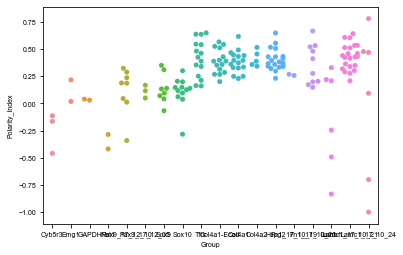

In [46]:
#swarmplot
swarm= sns.swarmplot(x="Group", y="Polarity_Index", data=smFISH)

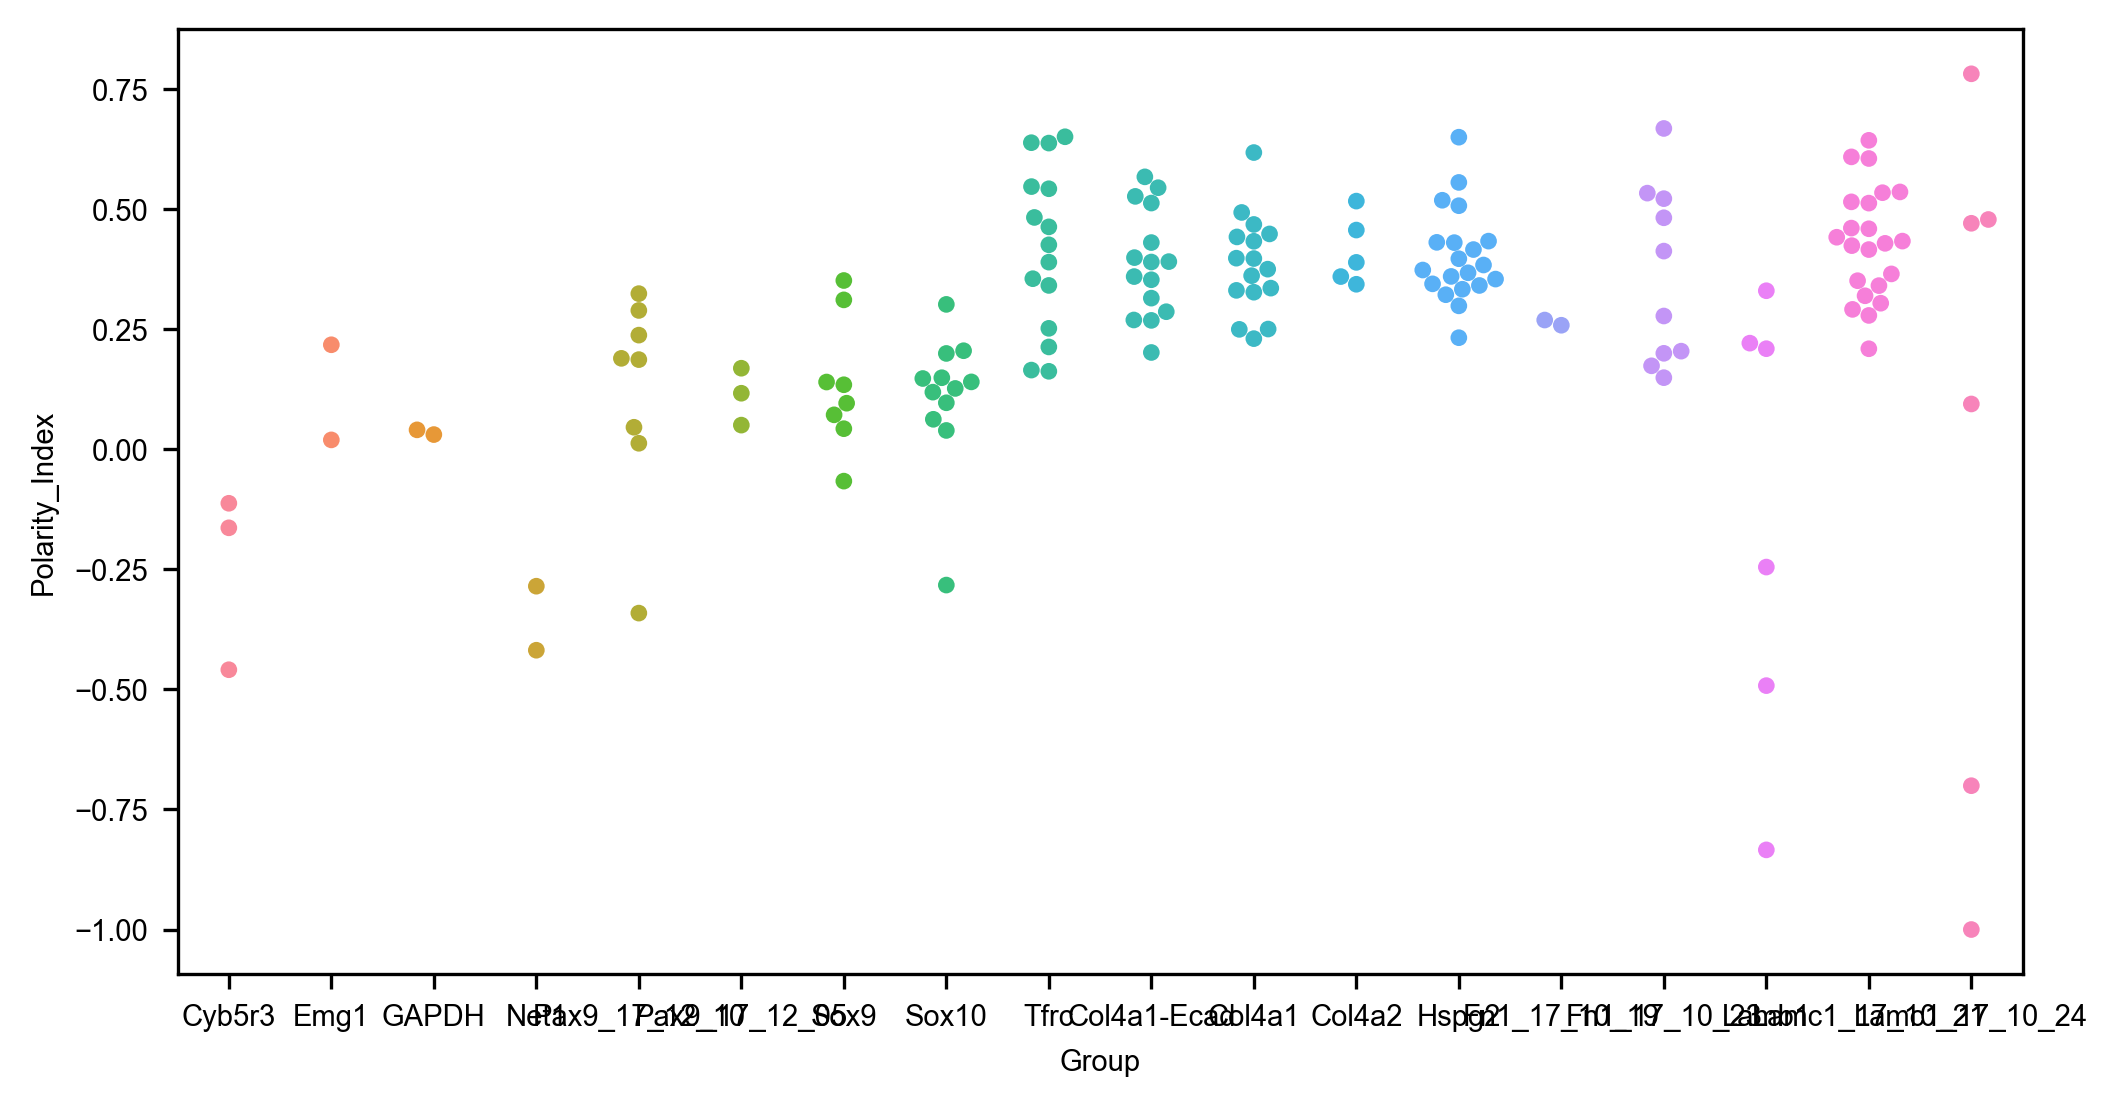

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(8.2,4.2), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75])

sns.swarmplot(x='Group', y='Polarity_Index', data=smFISH, size=4)
for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig("figures/smFISH_polarity-DATE.svg")